In [ ]:
pip install torchfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchfile: filename=torchfile-0.1.0-py3-none-any.whl size=5709 sha256=56973c06997a3ba481c4dc1ce283c26231b005b470df175cb69271f3446adeb4
  Stored in directory: /root/.cache/pip/wheels/ac/5c/3a/a80e1c65880945c71fd833408cd1e9a8cb7e2f8f37620bb75b
Successfully built torchfile


In [ ]:
pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 4.2 MB 50.2 MB/s 
     |████████████████████████████████| 1.2 MB 56.0 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
     |████████████████████████████████| 6.6 MB 45.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=0028b010a3b98848f25a2641fa2a58d58a0230aebeca571f84f372bbdfd88429
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy 
import pandas
import shutil
import os
import glob
import pandas as pd
import torch 
import torchfile
import matplotlib.pyplot as plt
import numpy as np
import h5py
from sentence_transformers import SentenceTransformer
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/Flowers.zip

Archive:  /content/Flowers.zip
  inflating: Image-to-synthesis-flowers/README.txt  
  inflating: Image-to-synthesis-flowers/setid.mat  
  inflating: Image-to-synthesis-flowers/imagelabels.mat  
  inflating: Image-to-synthesis-flowers/cvpr2016_flowers.tar.gz  
  inflating: Image-to-synthesis-flowers/102flowers.tgz  


In [ ]:
!tar -xvf "/content/Image-to-synthesis-flowers/102flowers.tgz"

Streaming output truncated to the last 5000 lines.
jpg/image_02266.jpg
jpg/image_00062.jpg
jpg/image_05821.jpg
jpg/image_03712.jpg
jpg/image_01142.jpg
jpg/image_03033.jpg
jpg/image_05760.jpg
jpg/image_02732.jpg
jpg/image_00183.jpg
jpg/image_05264.jpg
jpg/image_03778.jpg
jpg/image_07061.jpg
jpg/image_04468.jpg
jpg/image_00676.jpg
jpg/image_07610.jpg
jpg/image_02192.jpg
jpg/image_05112.jpg
jpg/image_05638.jpg
jpg/image_00053.jpg
jpg/image_02451.jpg
jpg/image_05857.jpg
jpg/image_08033.jpg
jpg/image_03902.jpg
jpg/image_07494.jpg
jpg/image_02357.jpg
jpg/image_05496.jpg
jpg/image_04496.jpg
jpg/image_07538.jpg
jpg/image_01801.jpg
jpg/image_00326.jpg
jpg/image_07644.jpg
jpg/image_01199.jpg
jpg/image_01168.jpg
jpg/image_07020.jpg
jpg/image_05006.jpg
jpg/image_03484.jpg
jpg/image_02825.jpg
jpg/image_04549.jpg
jpg/image_02011.jpg
jpg/image_04360.jpg
jpg/image_06847.jpg
jpg/image_07695.jpg
jpg/image_03540.jpg
jpg/image_08058.jpg
jpg/image_01230.jpg
jpg/image_00096.jpg
jpg/image_01517.jpg
jpg/image

In [ ]:
!tar -xvf  "/content/Image-to-synthesis-flowers/cvpr2016_flowers.tar.gz" -C '/content/Image-to-synthesis-flowers'

Streaming output truncated to the last 5000 lines.
text_c10/class_00094/image_07459.h5
text_c10/class_00094/image_07454.txt
text_c10/class_00094/image_07465.txt
text_c10/class_00094/image_07327.h5
text_c10/class_00094/image_07325.h5
text_c10/class_00094/image_07460.txt
text_c10/class_00094/image_07403.txt
text_c10/class_00094/image_07376.txt
text_c10/class_00094/image_07405.txt
text_c10/class_00094/image_07390.h5
text_c10/class_00094/image_07402.txt
text_c10/class_00094/image_07323.txt
text_c10/class_00094/image_07407.h5
text_c10/class_00094/image_07432.h5
text_c10/class_00094/image_07304.txt
text_c10/class_00094/image_07442.txt
text_c10/class_00094/image_07310.txt
text_c10/class_00094/image_07328.txt
text_c10/class_00094/image_07316.h5
text_c10/class_00094/image_07393.txt
text_c10/class_00094/image_07345.txt
text_c10/class_00094/image_07402.h5
text_c10/class_00094/image_07359.h5
text_c10/class_00094/image_07440.txt
text_c10/class_00094/image_07435.txt
text_c10/class_00094/image_07367.

In [ ]:
f = open("/content/Image-to-synthesis-flowers/allclasses.txt", 'r')
classlist = []
for i in f:
  classlist.append(i.strip('\n'))

In [ ]:
path_images = "/content/Image-to-synthesis-flowers/text_c10/"
texts = []
for e in classlist:
  texts.append(glob.glob(path_images + e +"/*.txt"))
caption_path =[]
for i in texts:
  for j in i: 
    caption_path.append(j)

In [ ]:
caption_path[0]

'/content/Image-to-synthesis-flowers/text_c10/class_00001/image_06750.txt'

In [ ]:
cap_str =[]
for i in caption_path:
  a = open(i, 'r')
  g= (a.read().split('\n'))[:-1]
  #cap_str.append("".join(g))
  cap_str.append(g)

In [ ]:
captions_all =[]
for i in cap_str:
  for j in i:
    captions_all.append(j)


In [ ]:
captions_all[6]

'this flower has purple petals as well as a yellow stamen.'

In [ ]:
captions_all[64]

'this flower is pink and green in color, with petals that have veins.'

In [ ]:
cap = captions_all

In [ ]:
image_names =[]
for i in caption_path:
  image_names.append(((i.split("/")[-1]).split('.')[0]+".jpg"))

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# caption_embeddings = model.encode(captions_all)

In [ ]:
# np.save("caption_embeddings_all", caption_embeddings)

In [ ]:
embeddings = np.load("/content/drive/MyDrive/caption_embeddings_all.npy")

In [ ]:
image_paths =[]
img_path = '/content/jpg'
for i in image_names:
  image_paths.append(img_path +"/"+ i)

# def data_loader(i, image_names):
#   img_path = '/content/jpg'
#   x = plt.imread(img_path +'/'+image_names[i])
#   return x

In [ ]:
len(image_paths)

8189

In [ ]:
image_path_all = []
for i in image_paths:
  for j in range(10):
    image_path_all.append(i)


In [ ]:
len(image_path_all)

81890

In [ ]:
import shutil
import os

In [ ]:
dst_path = '/content/images_final1/'
# os.mkdir(dst_path)
count =0 
for i in image_path_all:
  if count < 10:
    shutil.copy(i, (dst_path+ "image_00000"+str(count)+".jpg"))
  elif count >= 10 and count <100:
    shutil.copy(i, (dst_path+ "image_0000"+str(count)+".jpg"))
  elif count >=100 and count <1000:
    shutil.copy(i, (dst_path+ "image_000"+str(count)+".jpg"))
  elif count >=1000 and count < 10000:
    shutil.copy(i, (dst_path+ "image_00"+str(count)+".jpg"))
  elif count >=10000:
    shutil.copy(i, (dst_path+ "image_0"+str(count)+".jpg"))

  count = count +1
    # img_path_all.append(i)

In [ ]:
#!zip -r '/content/images_final1.zip' '/content/images_final1'


In [ ]:
f = glob.glob('/content/images_final1'+ "/*.jpg")

In [ ]:
len(f)

81890

In [ ]:
f[0]

'/content/images_final1/image_075952.jpg'

In [ ]:
f = os.listdir("/content/images_final1")

In [ ]:
len(f)

81890

In [ ]:
len(image_path_all)

81890

In [ ]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display
tf.__version__

'2.8.0'

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory("/content/images_final1/",labels=None,label_mode=None,class_names=None,color_mode='rgb',batch_size=128,image_size=(128, 128),shuffle=False,seed=None,validation_split=None,subset=None,interpolation='bilinear',follow_links=False,crop_to_aspect_ratio=False)

Found 81890 files belonging to 1 classes.


In [ ]:
def process(image):
    image = tf.cast((image-127.5)/127.5,tf.float32)
    return image
train_images = train_images.map(process)

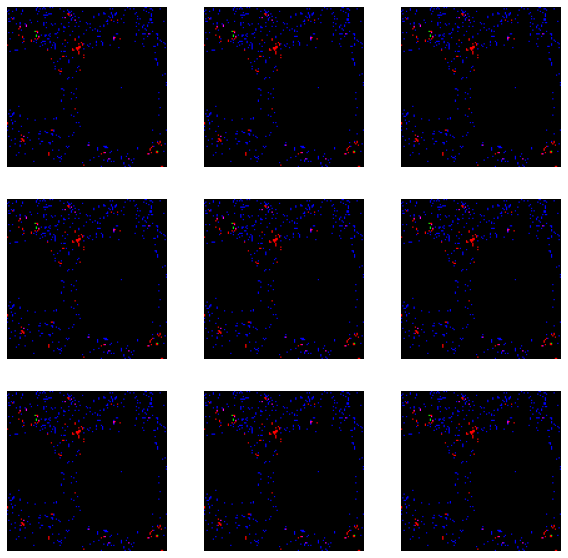

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images in train_images.take(1):
  for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
embeddings_tf = tf.convert_to_tensor(embeddings)

In [ ]:
embeddings.shape

(81890, 384)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(32*32*128, use_bias=False, input_shape=(384,)))
    model.add(layers.GaussianNoise(1))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((32, 32, 128)))
    assert model.output_shape == (None, 32, 32, 128)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 64, 64, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 128, 128, 3)

    return model

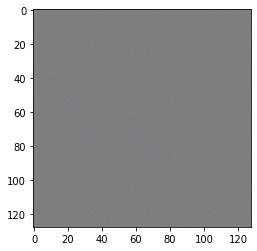

In [ ]:
generator = make_generator_model()
import statistics

noise = tf.random.normal([1, 384])
generated_image = generator(noise, training=False)
xyz=tf.reshape(generated_image,(128,128,3))
xyz = tf.cast((xyz*127.5+127.5),tf.int32)
plt.imshow((xyz))

In [ ]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 131072)            50331648  
                                                                 
 gaussian_noise_1 (GaussianN  (None, 131072)           0         
 oise)                                                           
                                                                 
 batch_normalization_3 (Batc  (None, 131072)           524288    
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 131072)            0         
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 64)      

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[128, 128, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00107774]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images,embed):
    #noise = tf.random.normal([256, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(embed, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  predictions = predictions*127.5+127.5
  predictions = tf.cast(predictions,tf.int32)
  fig = plt.figure(figsize=(4, 4),dpi=200)

  for i in range(predictions.shape[0]):
      plt.subplot(2, 2, i+1)
      plt.imshow(predictions[i, :, :, :])
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
dataset,b, epochs,df = train_images, embeddings_tf, 60, cap

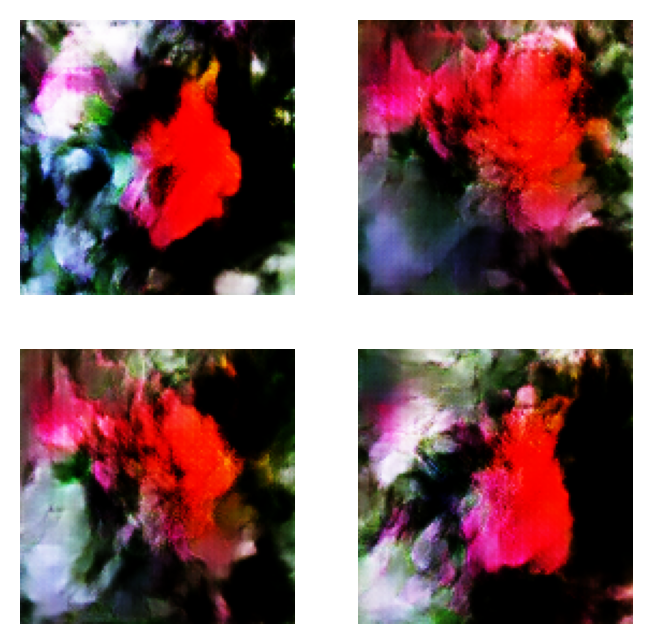

In [ ]:
import random
zxcv = random.sample(range(0,81890),4)
for epoch in range(epochs):
  start = time.time()
  count = 0
  for image_batch in dataset:
    for i in range(count,count+128): 
      emb = b[i]
      emb = tf.reshape(emb,(1,384))
      emb = emb + 0.001104205
      emb = emb / (0.05101909) 
      #noise = tf.random.normal((1,384), stddev=0.9)
      emb = emb + noise
      count += 1
      if count % 128 == 1:
        embed = emb
      else:
        embed = tf.concat([embed,emb],0)
      if count == 81890:
        break   
    train_step(image_batch,embed)
    if count == 81890:
        break

  # Produce images for the GIF as you go
  display.clear_output(wait=True)
  cnt = 0
  for l in zxcv:
    test = b[l]    
    test = tf.reshape(test,(1,384))
    test = test + 0.001104205
    test = test  / (0.05101909) 
    cnt += 1 
    if cnt == 1:
      test_set = test
    else:
      test_set = tf.concat([test_set,test],0)
    capt =  df[l]
    print(capt)
  generate_and_save_images(generator,
                            epoch + 1,
                            test_set)

  # Save the model every 15 epochs
  if (epoch + 1) % 5 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
# Generate after the final epoch
display.clear_output(wait=True)
generate_and_save_images(generator,
                          epochs,
                          test_set)

In [ ]:
len(cap)

81890

In [ ]:
cap[48581]

'the petals of the flower are yellow with red details and have a yellow center.'